In [40]:
import os
import torch
import torchvision
from torch import nn
from torchvision import transforms
from torch.utils.data import Dataset
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
import time
from pthflops import count_ops
from tqdm import tqdm

#Load video file
vRead = iio.imread('data/c_elegans.mp4')
video = np.array(vRead)
testFrame = video[0]

torch.__version__

'1.13.1'

In [8]:
print("Cuda available: ", torch.cuda.is_available())
if(torch.cuda.is_available()):
    torch.cuda.set_device("cuda:1")

    print("Is cuDNN version:", torch.backends.cudnn.version())

    print("cuDNN enabled:a", torch.backends.cudnn.enabled)

    print("Device count: ", torch.cuda.device_count())

    print("Current device: ", torch.cuda.current_device())

    print("Device name: ", torch.cuda.get_device_name(torch.cuda.current_device()))
#Setup device agnostic code (i.e use GPU if possible)
device = "cuda" if torch.cuda.is_available() else "cpu"
gpuNum = 1
print(device)

Cuda available:  True
Is cuDNN version: 8302
cuDNN enabled:a True
Device count:  4
Current device:  1
Device name:  NVIDIA TITAN Xp
cuda


In [26]:
#Video Metadata
import imageio.v3 as iio
props = iio.improps("data/c_elegans.mp4")
print("Shape (frames, w, h, RGB): \n" + str(props.shape))
numFrames = props.shape[0]
print(props.dtype)

Shape (frames, w, h, RGB): 
(2484, 322, 344, 3)
uint8


In [11]:
if(os.path.isfile('testFrame.png') == False):
    frame1 = iio.imwrite('testFrame.png', testFrame,format='PNG')
else:
    print("test frame is already stored locally")

test frame is already stored locally


img is now on cuda:1
torch.Size([322, 322, 3])


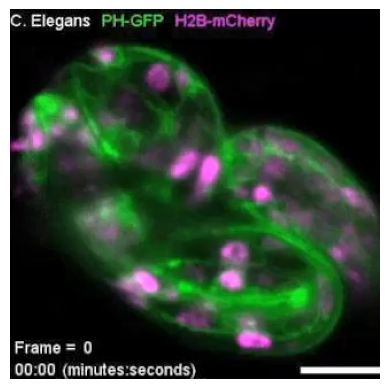

In [43]:
#Square the image
l = min(props.shape[1], props.shape[2])
#Encode Tensor
frame = torch.as_tensor(iio.imread('testFrame.png'))[:l, :l]
img = torch.as_tensor(frame).to(device)
plt.imshow(img.cpu())
plt.axis('off')
print('img is now on', img.device)
print(img.shape)

In [6]:
quit()

: 